In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
         'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [4]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=names)

In [5]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
df1.shape

(32561, 15)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [7]:
df[numerical_feature]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [8]:
df[cat_feature]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [9]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [10]:
df.shape

(32561, 15)

In [11]:
#checking the missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [12]:
df['income'].value_counts(normalize=True)*100

 <=50K    75.919044
 >50K     24.080956
Name: income, dtype: float64

In [13]:
# Examine the distribution of the target variable
df['age'].value_counts(normalize=True)*100

36    2.757901
31    2.727189
34    2.721047
23    2.693406
35    2.690335
        ...   
83    0.018427
88    0.009213
85    0.009213
86    0.003071
87    0.003071
Name: age, Length: 73, dtype: float64

In [14]:
for col in cat_feature:
    print(f"{col}:{df[col].value_counts(normalize=True)*100}")
    print("----------------------------------------------------")

workclass: Private             69.703019
 Self-emp-not-inc     7.803814
 Local-gov            6.427935
 ?                    5.638647
 State-gov            3.986364
 Self-emp-inc         3.427413
 Federal-gov          2.948312
 Without-pay          0.042996
 Never-worked         0.021498
Name: workclass, dtype: float64
----------------------------------------------------
education: HS-grad         32.250238
 Some-college    22.391818
 Bachelors       16.446055
 Masters          5.291607
 Assoc-voc        4.244341
 11th             3.608612
 Assoc-acdm       3.276926
 10th             2.865391
 7th-8th          1.983969
 Prof-school      1.768987
 9th              1.578576
 12th             1.329812
 Doctorate        1.268389
 5th-6th          1.022696
 1st-4th          0.515955
 Preschool        0.156629
Name: education, dtype: float64
----------------------------------------------------
marital-status: Married-civ-spouse       45.993673
 Never-married            32.809189
 Divorced   

<AxesSubplot: xlabel='education', ylabel='count'>

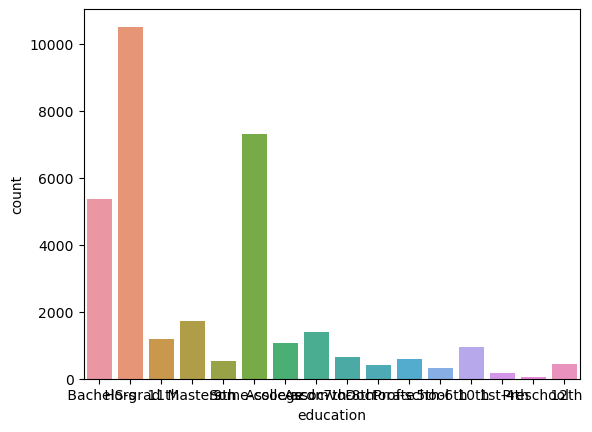

In [15]:
sns.countplot(x=df['education'])

<AxesSubplot: xlabel='occupation', ylabel='count'>

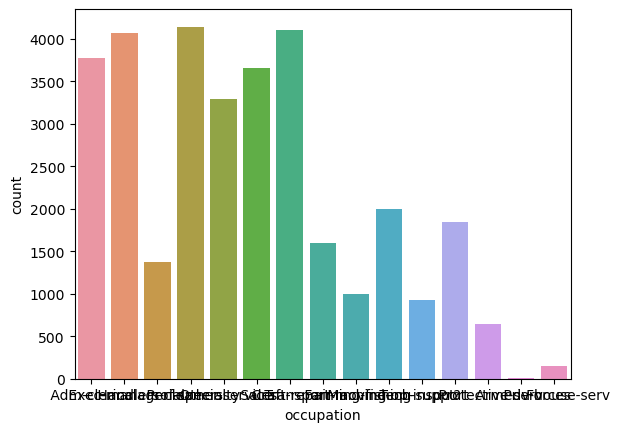

In [16]:
sns.countplot(x=df['occupation'])

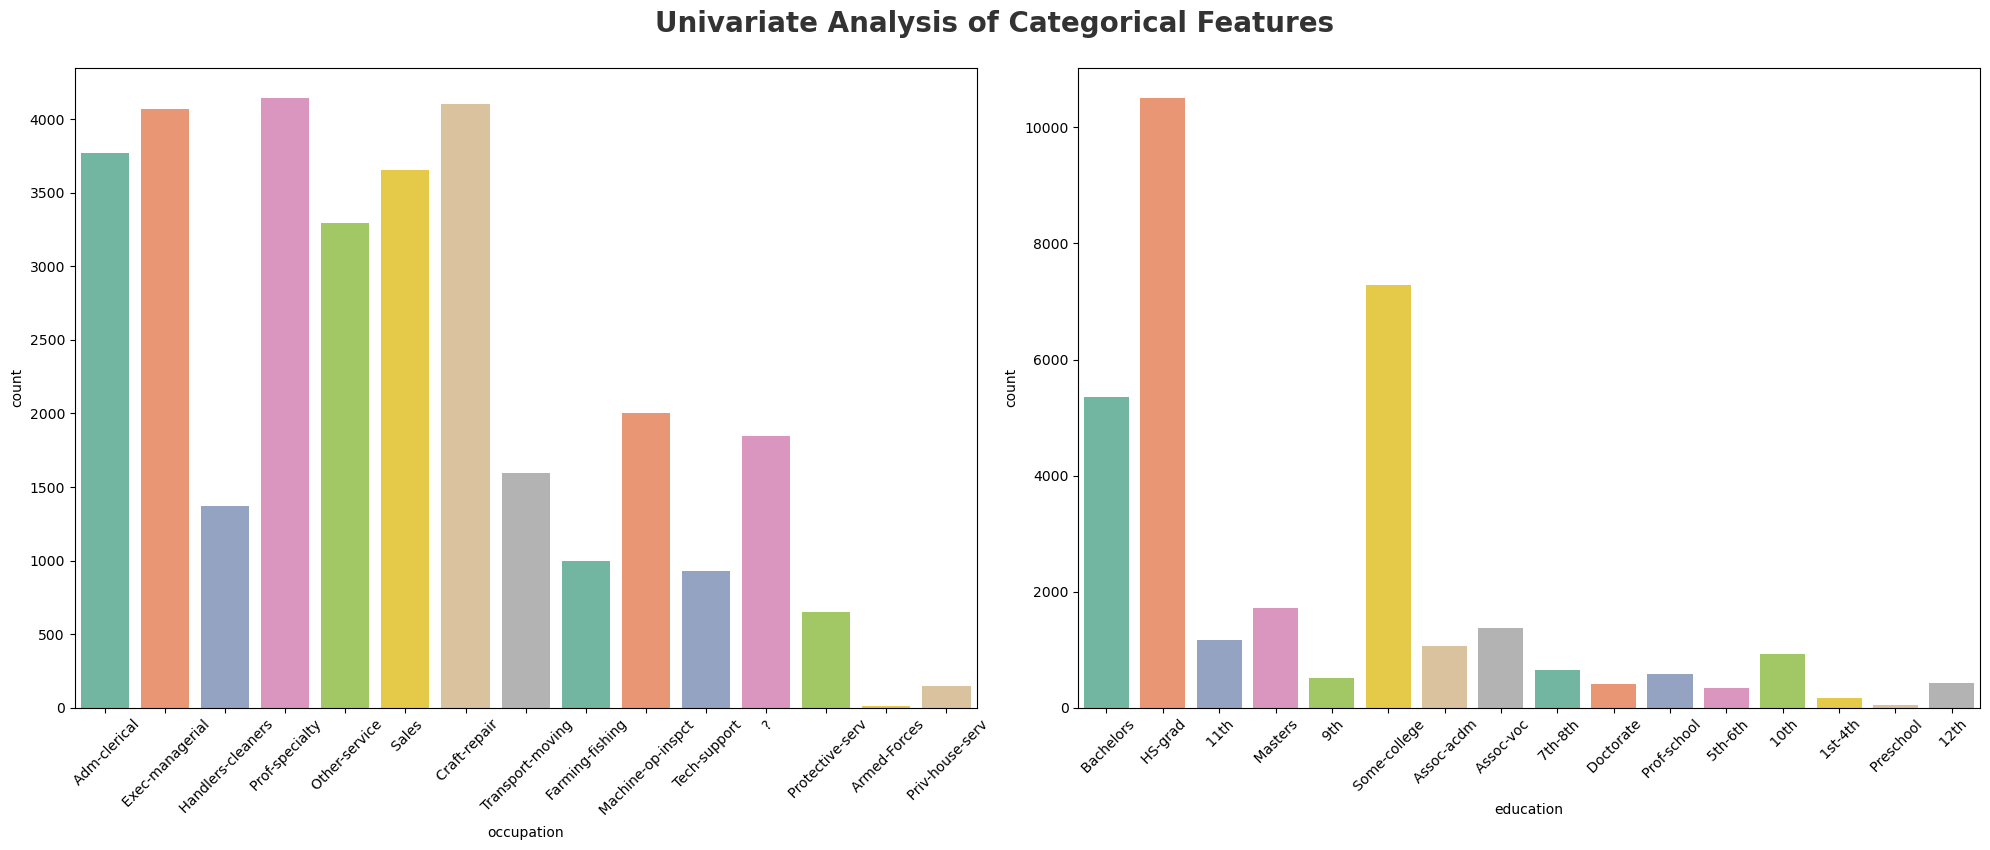

In [17]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold',alpha=0.8, y=1.)
category = [ 'occupation', 'education']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [18]:
numerical_feature

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'education-num'}>],
       [<AxesSubplot: title={'center': 'hours-per-week'}>,
        <AxesSubplot: >]], dtype=object)

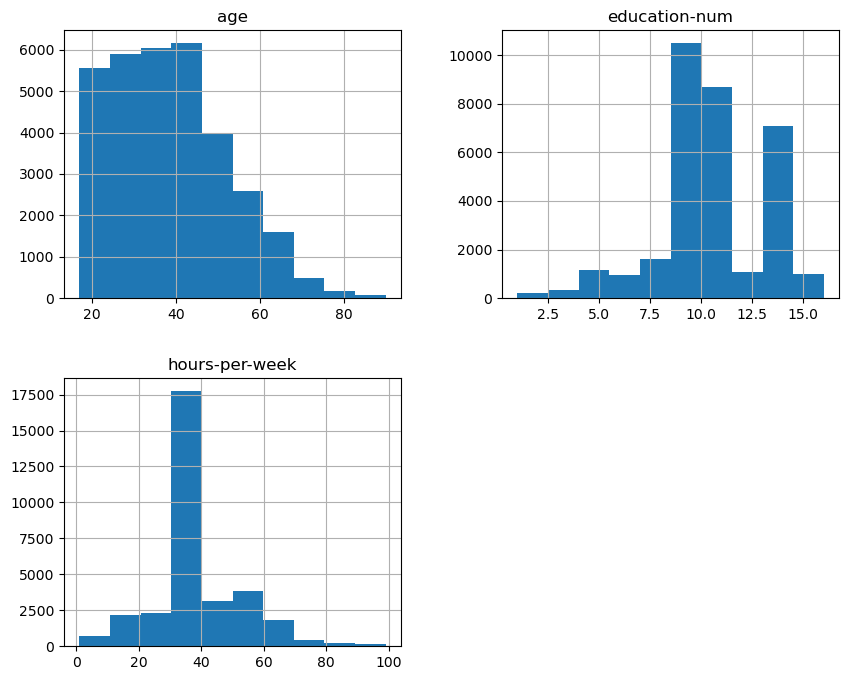

In [19]:
# Visualize the distribution of numerical variables
df.hist(column=['age','education-num','hours-per-week' ],figsize=(10,8))

<AxesSubplot: xlabel='capital-gain', ylabel='Density'>

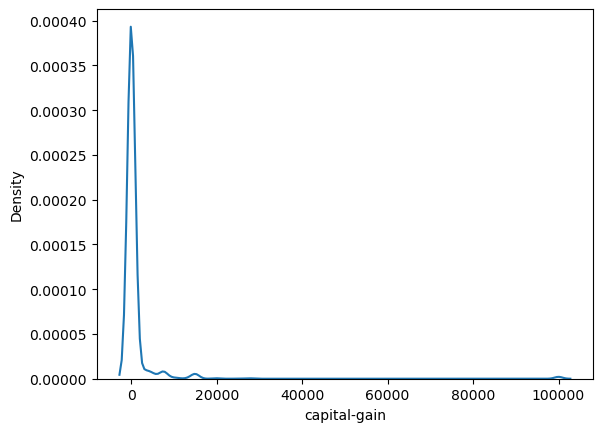

In [20]:
sns.kdeplot(df['capital-gain'])

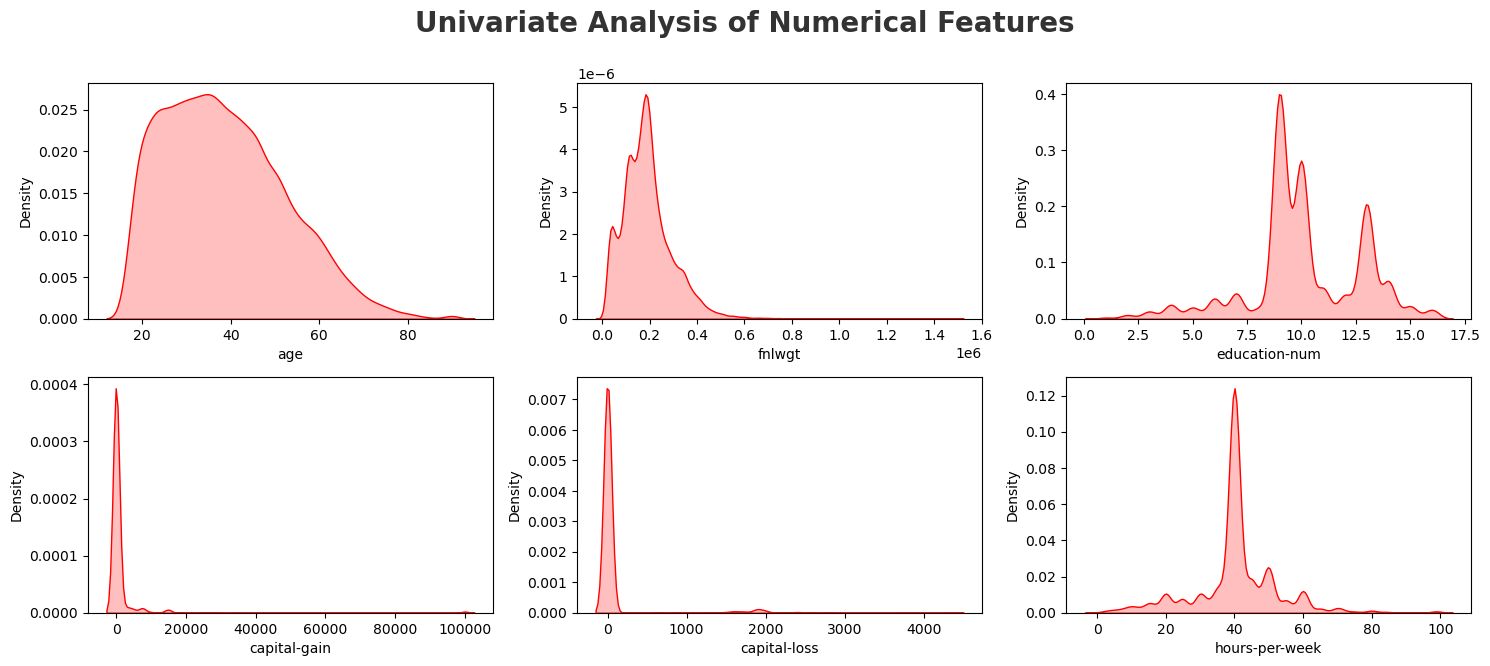

In [21]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',
alpha=0.8, y=1.)
for i in range(0, len(numerical_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_feature[i]],shade=True, color='r')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

<AxesSubplot: xlabel='age', ylabel='hours-per-week'>

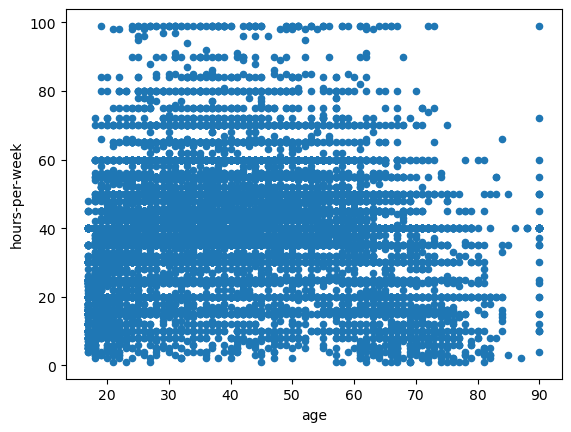

In [22]:
# Analyze the relationship between variables
df.plot.scatter(x='age',y='hours-per-week')

<AxesSubplot: title={'center': 'age'}, xlabel='income'>

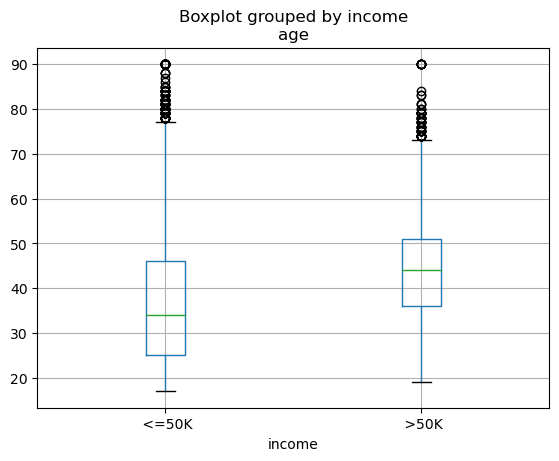

In [24]:
df.boxplot(column='age', by='income')

In [25]:
# Use summary statistics to gain insights
df.groupby('income').mean()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


<AxesSubplot: xlabel='education-num', ylabel='capital-gain'>

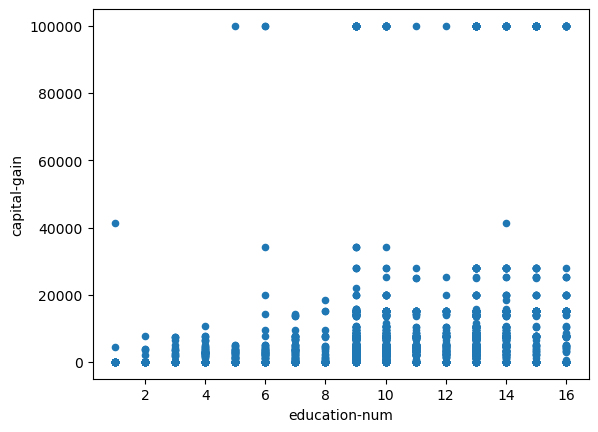

In [26]:
# Check for outliers
df.plot.scatter(x='education-num', y='capital-gain')

<AxesSubplot: >

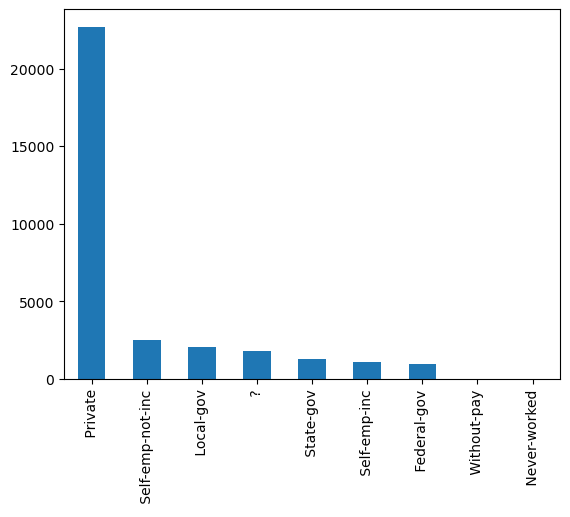

In [27]:
# Handle categorical variables
df['workclass'].value_counts().plot(kind='bar')

<AxesSubplot: >

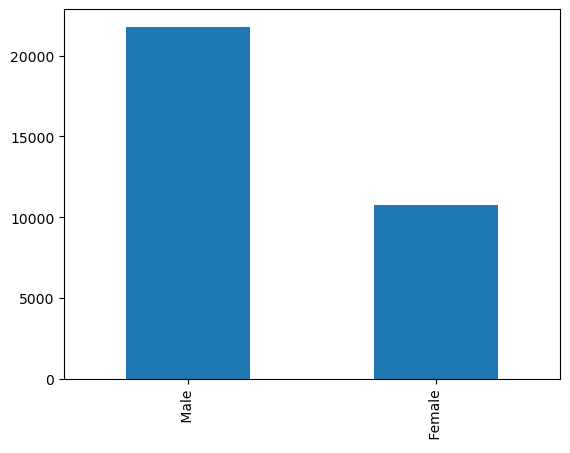

In [28]:
df['sex'].value_counts().plot(kind='bar')

In [27]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<AxesSubplot: >

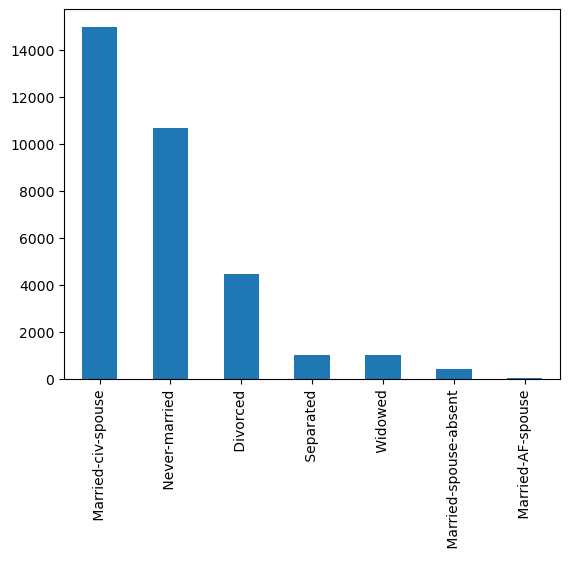

In [29]:
df['marital-status'].value_counts().plot(kind='bar')

<AxesSubplot: >

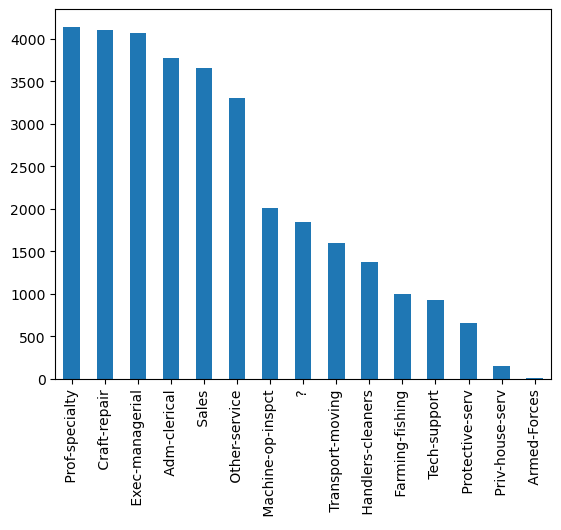

In [30]:
df['occupation'].value_counts().plot(kind='bar')

In [31]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [32]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [33]:
df.std()

age                   13.640433
fnlwgt            105549.977697
education-num          2.572720
capital-gain        7385.292085
capital-loss         402.960219
hours-per-week        12.347429
dtype: float64

<AxesSubplot: ylabel='race'>

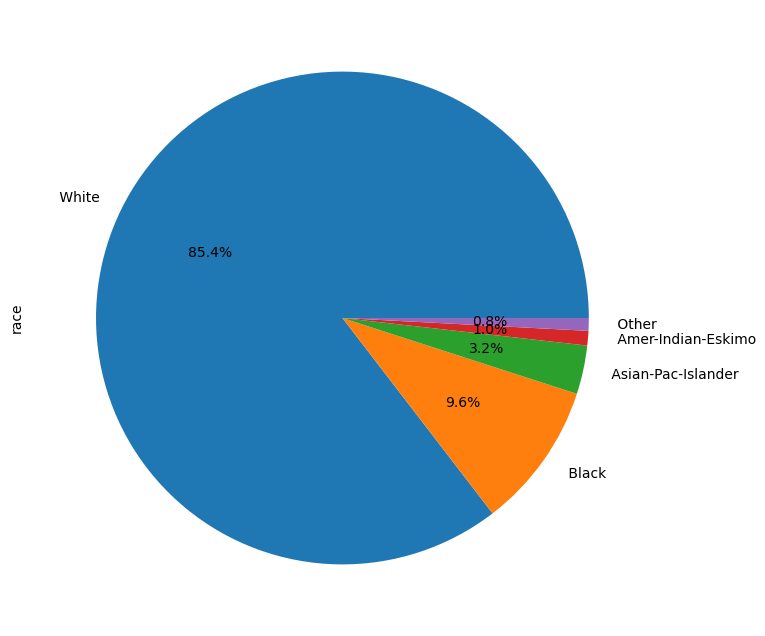

In [37]:
df["race"].value_counts().plot.pie(y=df["race"],figsize=(10,8),autopct='%1.1f%%')

<AxesSubplot: ylabel='education'>

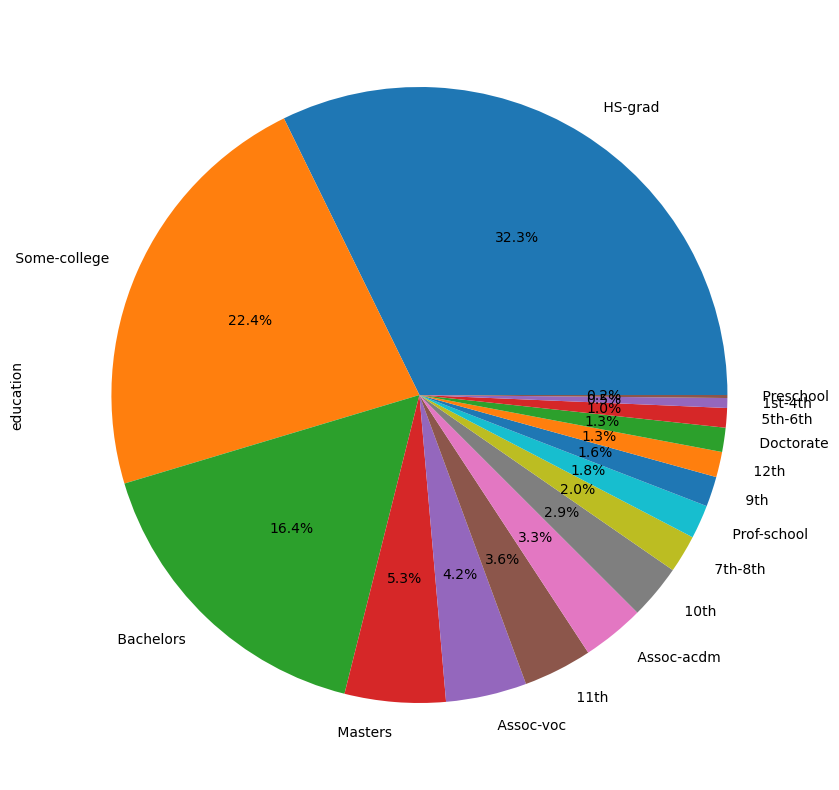

In [39]:
df["education"].value_counts().plot.pie(y=df["education"],figsize=(10,10),autopct='%1.1f%%')

In [46]:
df_edu=df["education"].value_counts()[:5]

In [47]:
education = pd.DataFrame(df['education'].value_counts()) #Dataframe of education onthe basis of education
education.rename(columns = {'education':'Count'},inplace=True)

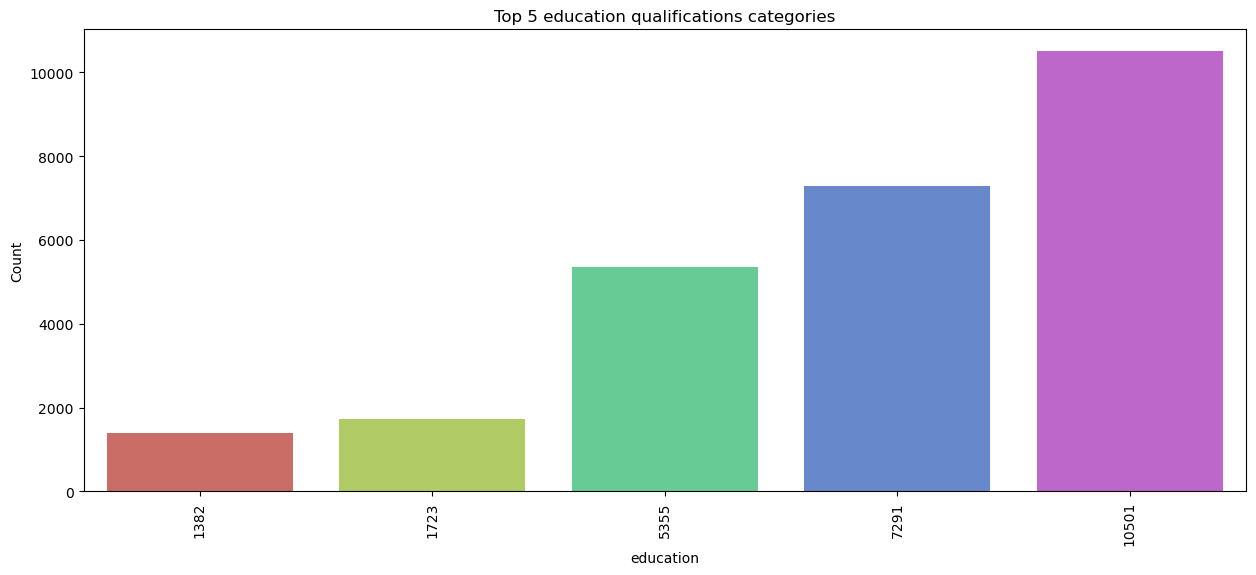

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_edu, y ='Count',data = education[:5],palette='hls')
plt.title('Top 5 education qualifications categories')
plt.xticks(rotation=90)
plt.show()

In [58]:
df[numerical_feature]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [53]:
#which education have largest occupation
df_edu_perweek=df.groupby(['education'])['hours-per-week'].sum().sort_values(ascending=False).reset_index()


In [55]:
df_edu_perweek

,education,hours-per-week
0,HS-grad,426082
1,Some-college,283272
2,Bachelors,228198
3,Masters,75530
4,Assoc-voc,57506
5,Assoc-acdm,43218
6,11th,39863
7,10th,34570
8,Prof-school,27317
9,7th-8th,25431


Text(0.5, 1.0, 'Most Popular education qualifications with working hours  in census data')

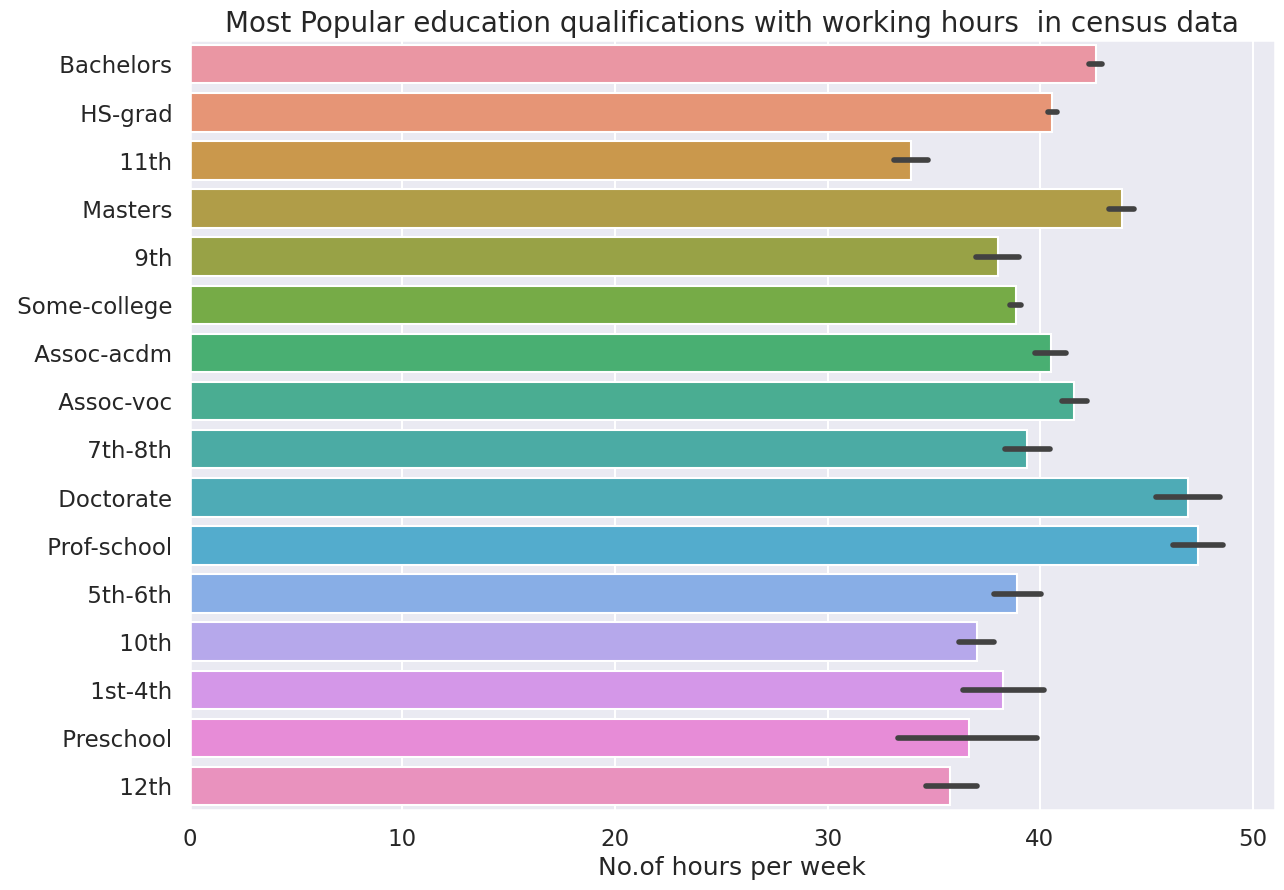

In [56]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'hours-per-week' , y = 'education' , data = df )
ax.set_xlabel('No.of hours per week')
ax.set_ylabel('')
ax.set_title("Most Popular education qualifications with working hours  in census data", size = 20)